# Метод опорных векторов - Support Vector Machines 


## Подделка вина

Чаще всего вино подделывают, разбавляя его более дешёвыми продуктами (например, соком), а иногда и с помощью опасных химикатов или подсластителей (чтобы добавить цвет или вкус).

Другой тип подделки - продажа более дешёвых вин под более дорогими марками.

<img src="wine.jpg">

## Цели проекта

Компания-дистрибьютор вина недавно столкнулась с подделками. В итоге был проведён аудит различных вин с помощью химического анализа. Компания занимается экспортом очень качественных и дорогих вин, но один из поставщиков попытался передать дешёвое вино под видом более дорогого. Компания-дистрибьютор наняла Вас, чтобы Вы создали модель машинного обучения, которая предскажет низкое качество вина (то есть, "подделку"). Они хотят узнать, возможно ли определить разницу между дешёвыми и дорогими винами.


Источник данных: *P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties.
In Decision Support Systems, Elsevier, 47(4):547-553, 2009.*

---
---

**ЗАДАНИЕ: Обшая цель - используя данные ниже, разработать модель машинного обучения, которая будет предсказывать на основе некоторых химических тестов, является ли вино настоящим или поддельным.**

---
---

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("..\\DATA\\wine_fraud.csv")

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   object 
 12  type                  6497 non-null   object 
dtypes: float64(11), object(2)
memory usage: 660.0+ KB


**Сколько различных значений находится в целевой колонке quality, значения которой мы будем предсказывать?**

In [6]:
df['quality'].value_counts().index

Index(['Legit', 'Fraud'], dtype='object')

In [7]:
df['type'].value_counts().index


Index(['white', 'red'], dtype='object')

**Нарисуем график countplot, отображающий количество для каждой из категорий - Legit и Fraud.**

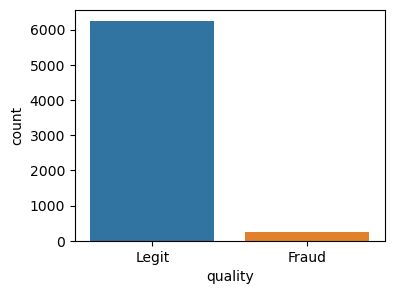

In [8]:
plt.figure(figsize=(4,3), dpi=100)
sns.countplot(x=df.quality);


**Выясним, есть ли разница в количестве подделок в зависимости от того, красное вино или белое. Нарисуем график countplot, отображая *тип* вина по оси x, и разбивая значения Fraud и Legit с помощью параметра hue.**

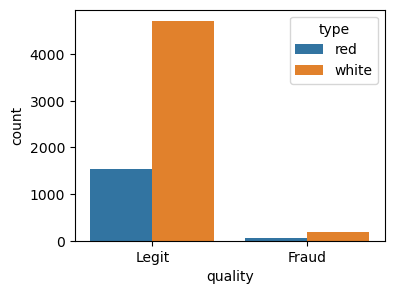

In [9]:
plt.figure(figsize=(4,3), dpi=100)
sns.countplot(x=df.quality, hue=df.type);


In [10]:
df['type'].value_counts() 
# Видно, что белых вин гораздо больше чем красных, так что утверждать о взаимосвязи типа вина и 
# его кол-ва подделок нельзя


white    4898
red      1599
Name: type, dtype: int64

**Выясним какой процент красных вин является подделкой? Какой процент белых вин является подделкой?**

In [11]:
red_percentage = df.type[df.type=='red'].loc[df.quality=='Fraud'].count() * 100 /df.type[
    df.type == "red"].count()
print(f'Percentage of fraud in Red Wines:\n{red_percentage} ')

Percentage of fraud in Red Wines:
3.9399624765478425 


In [12]:
red_percentage = df.type[df.type=='white'].loc[df.quality=='Fraud'].count() * 100 /df.type[
    df.type == "white"].count()
print(f'Percentage of fraud in Red Wines:\n{red_percentage} ')

Percentage of fraud in Red Wines:
3.736218864842793 


**Вычислим корреляцию между различными признаками и колонкой "quality". Чтобы сделать это, можно использовать значения 0 и 1 вместо текстовых значений Legit и Fraud.**

In [13]:
corr_df = df.copy()
corr_df.quality = corr_df.quality.map({'Legit' : 0, 'Fraud' : 1})
corr_df.corr()['quality']

fixed acidity           0.021794
volatile acidity        0.151228
citric acid            -0.061789
residual sugar         -0.048756
chlorides               0.034499
free sulfur dioxide    -0.085204
total sulfur dioxide   -0.035252
density                 0.016351
pH                      0.020107
sulphates              -0.034046
alcohol                -0.051141
quality                 1.000000
Name: quality, dtype: float64

**Нарисуем график bar plot, отобразив значения корреляции для поддельных вин.**

<AxesSubplot:>

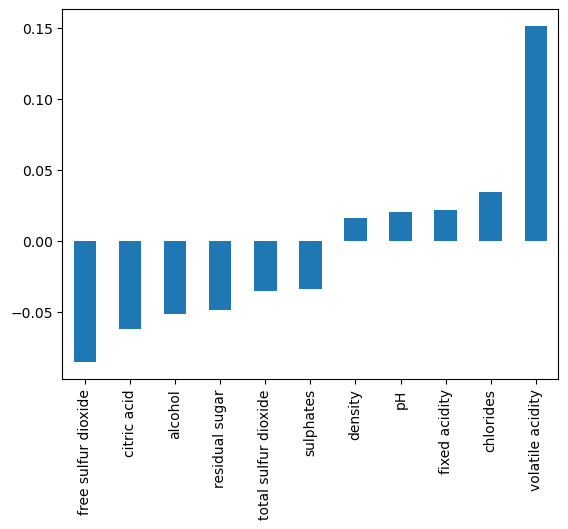

In [89]:
#sns.barplot(x = corr_df[corr_df.quality==1].corr()['quality'].index, 
#            y=corr_df.corr()['quality'].sort_values())
#plt.xticks(rotation=90)
corr_df.corr()['quality'][:-1].sort_values().plot(kind='bar')

In [49]:
corr_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,0,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,0,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,0,white


**Нарисуем график clustermap с помощью seaborn, чтобы исследовать связи между переменными.**

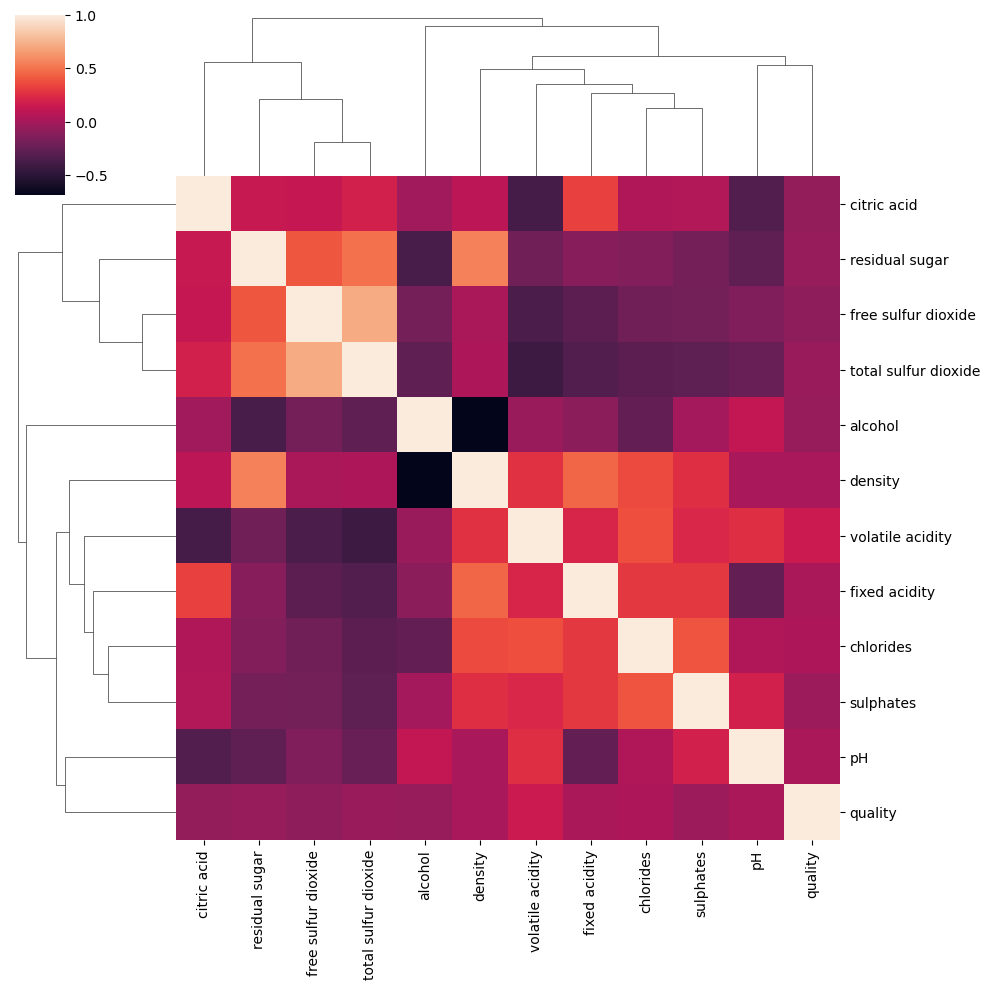

In [90]:
sns.clustermap(data=corr_df.corr())

----
## Модель машинного обучения

**Сконвертируем категориальную колонку "type" из текстовых значений "red" и "white" в dummy-переменные:**

In [58]:
#df.type = 
df = pd.get_dummies(df, columns=['type'],drop_first=True)
# Другой варинат - df['type'] = pd.get_dummies(df['type'], drop_first=True)

In [59]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,Legit,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,Legit,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,Legit,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,Legit,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,Legit,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,Legit,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,Legit,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,Legit,1


**Разделим данные на признаки X и целевую переменную y (колонка "quality")**

In [60]:
X = df.drop('quality', axis=1)

In [61]:
y = df.quality

**Разобьем данные на обучающий и тестовый набор данных, в отношении 90% и 10%. Замечание - в решении мы используем random state = 101**

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
>>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**Смасштабируем данные в наборах X train и X test.**

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()

In [67]:
scaled_X_train = scaler.fit_transform(X_train)

In [68]:
scaled_X_test = scaler.transform(X_test)

**Создадим экземпляр классификатора Support Vector Machine. Раньше мы оставляли эту модель "пустой" (то есть, без параметров). Однако, поскольку мы знаем, что классы несбалансированы, для решения этой проблемы мы можем автоматически подобрать веса обратно пропорционально тому, как часто встречаются классы во входных переменных, используя параметр в вызове метода SVC().**

In [69]:
from sklearn.svm import SVC

In [72]:
base_model = SVC(class_weight='balanced')

**С помощью GridSearchCV выполним поиск по сетке значений параметров C и gamma.**

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
param_grid = ({'kernel' : ['linear', 'poly', 'rbf'], 
               'C' : [0.001, 0.01, 0.1, 0.5, 1],
               'gamma' : ['scale', 'auto'],})

In [78]:
grid_model = GridSearchCV(base_model, param_grid)

In [79]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [81]:
grid_model.best_params_

{'C': 0.001, 'gamma': 'scale', 'kernel': 'poly'}

**Отобразим матрицу "confusion matrix" и отчёт "classification report" для данной модели.**

In [80]:
from sklearn.metrics import confusion_matrix, classification_report

In [84]:
last_pred = grid_model.predict(scaled_X_test)

In [85]:
confusion_matrix(y_test, last_pred)

array([[  7,  20],
       [ 15, 608]], dtype=int64)

In [88]:
print(classification_report(y_test, last_pred))

              precision    recall  f1-score   support

       Fraud       0.32      0.26      0.29        27
       Legit       0.97      0.98      0.97       623

    accuracy                           0.95       650
   macro avg       0.64      0.62      0.63       650
weighted avg       0.94      0.95      0.94       650



<font size = 5> Честно сказать модель не оч, скорее всего это связанно с тем, что сами данные недостаточно репрезентативны для решения данной задачи